In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import CARETUP

In [7]:
data = pd.read_csv("weatherAUS.csv")

In [240]:
sample = data.sample(2000)
sample

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
11696,2016-06-20,CoffsHarbour,16.1,22.2,49.4,NaN,NaN,NW,61.0,NW,...,60.0,43.0,1003.5,1001.5,NaN,8.0,18.5,21.2,Yes,No
37266,2011-01-08,WaggaWagga,20.5,32.4,0.0,8.0,12.6,ENE,43.0,NE,...,54.0,37.0,1011.8,1008.8,1.0,6.0,25.3,31.0,No,No
20980,2017-02-07,NorahHead,23.0,25.8,0.0,NaN,NaN,SSW,57.0,SSW,...,99.0,94.0,1016.7,1017.9,NaN,NaN,23.7,22.8,No,Yes
4289,2012-07-03,BadgerysCreek,1.0,15.5,0.0,NaN,NaN,SW,31.0,NaN,...,78.0,42.0,1020.9,1018.1,NaN,NaN,8.2,15.0,No,No
3544,2010-05-20,BadgerysCreek,3.9,20.1,0.4,NaN,NaN,NNE,17.0,SW,...,93.0,55.0,1023.6,1020.1,NaN,NaN,11.9,19.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91522,2012-07-05,GoldCoast,9.2,20.8,0.0,NaN,NaN,S,46.0,SSW,...,55.0,51.0,1025.2,1023.4,NaN,NaN,15.8,19.6,No,No
61270,2009-03-30,Sale,8.2,22.7,0.0,5.0,3.2,E,41.0,W,...,96.0,63.0,1025.8,1024.3,7.0,5.0,13.4,21.4,No,No
8193,2015-02-12,Cobar,23.1,35.1,0.0,6.4,NaN,E,44.0,SSE,...,54.0,25.0,1018.8,1015.4,5.0,7.0,24.8,33.2,No,No
56211,2012-01-14,Ballarat,9.1,19.4,0.0,NaN,NaN,SSE,52.0,SSE,...,74.0,48.0,1019.1,1017.6,8.0,NaN,11.6,18.6,No,No


In [197]:

# convert cartesian direction into degree where N = 0
arr=["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
sample["WindGustDirDeg"] = (pd.Categorical(sample["WindGustDir"], categories=arr).codes) * 360 / (len(arr) )
sample

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDirDeg
110565,2014-08-15,Albany,11.2,16.4,3.8,0.4,7.4,NaN,NaN,S,...,61.0,1030.5,1028.4,5.0,2.0,13.8,15.0,Yes,No,-22.5
25047,2011-07-09,Penrith,-0.3,17.7,0.0,NaN,NaN,W,31.0,NaN,...,36.0,NaN,NaN,NaN,NaN,4.0,16.7,No,No,270.0
18322,2009-07-27,NorahHead,8.6,17.8,2.8,NaN,NaN,WSW,24.0,W,...,48.0,1015.9,1015.6,NaN,NaN,12.1,17.5,Yes,No,247.5
88839,2013-08-25,Cairns,16.6,28.0,0.0,6.4,11.0,SE,43.0,S,...,38.0,1021.2,1018.3,3.0,1.0,23.2,26.8,No,No,135.0
123042,2015-04-29,Perth,13.6,24.9,0.0,3.6,1.3,NNE,20.0,NE,...,44.0,1019.8,1016.6,7.0,7.0,20.3,23.4,No,No,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85032,2011-05-22,Brisbane,17.0,24.5,10.8,2.2,4.7,E,15.0,SW,...,64.0,1022.9,1017.9,7.0,7.0,18.7,23.1,Yes,No,90.0
25370,2012-05-27,Penrith,5.4,18.1,0.0,NaN,NaN,S,30.0,NaN,...,45.0,NaN,NaN,NaN,NaN,9.1,17.5,No,No,180.0
3530,2010-05-06,BadgerysCreek,3.4,20.7,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,NaN,1019.2,NaN,NaN,NaN,19.4,NaN,NaN,-22.5
73653,2013-11-07,Nhil,17.8,27.4,0.0,NaN,NaN,WSW,44.0,NW,...,38.0,1009.3,1009.6,NaN,NaN,19.8,25.3,No,No,247.5


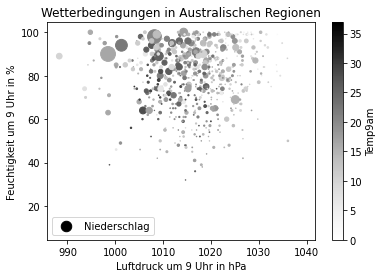

In [93]:
fig, ax = plt.subplots()

sample.plot.scatter(x='Pressure9am', y="Humidity9am", s='Rainfall', c="Temp9am", label="Niederschlag", ax=ax)
plt.title("Wetterbedingungen in Australischen Regionen")
leg = plt.legend()
leg.legendHandles[0].set_color("black")
ax.set_xlabel('Luftdruck um 9 Uhr in hPa', fontsize=10)
ax.set_ylabel('Feuchtigkeit um 9 Uhr in %', fontsize=10)
plt.show()

fig.savefig("Multidimensional.png")

In [114]:
# code from https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    xymin = min(np.max(np.abs(x)), np.max(np.abs(y)))

    bins = 100
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

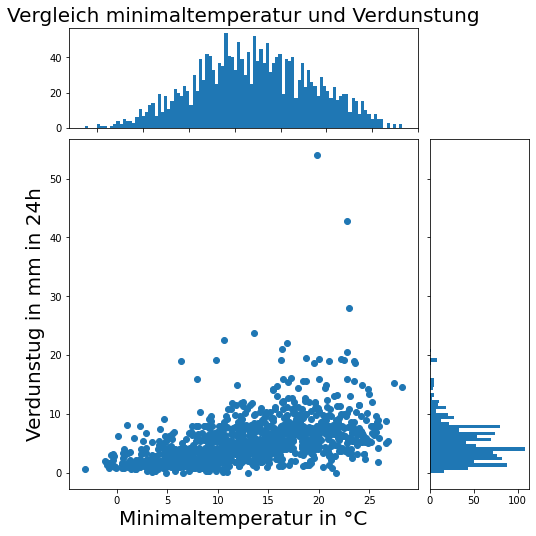

In [127]:
#fig.savefig("Multidimensional.png")




fig = plt.figure(figsize=(8, 8))


# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

#plt.title("Wetterbedingungen in Australischen Regionen")


ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[1, 1])

ax_histx.set_title("Vergleich minimaltemperatur und Verdunstung", fontsize=20)

ax.set_xlabel('Minimaltemperatur in °C', fontsize=20)
ax.set_ylabel('Verdunstug in mm in 24h', fontsize=20)

# use the previously defined function
scatter_hist(sample["MinTemp"], sample["Evaporation"], ax, ax_histx, ax_histy)

plt.show()

fig.savefig("Redundanz.png")

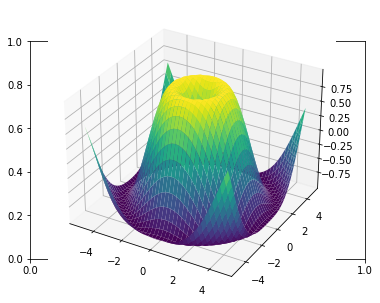

In [135]:
# code from https://matplotlib.org/stable/gallery/pyplots/whats_new_99_mplot3d.html#sphx-glr-gallery-pyplots-whats-new-99-mplot3d-py

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D



X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()

ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)




plt.show()

fig.savefig("Origininelle_vis.png")

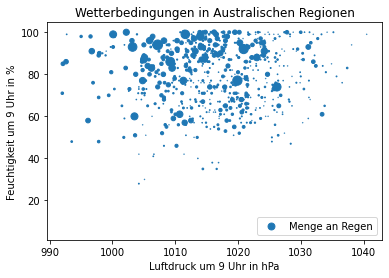

In [241]:
fig, ax = plt.subplots()

sample.plot.scatter(x='Pressure9am', y="Humidity9am", s='Rainfall', ax=ax, label="Menge an Regen")
plt.title("Wetterbedingungen in Australischen Regionen")
ax.set_xlabel('Luftdruck um 9 Uhr in hPa', fontsize=10)
ax.set_ylabel('Feuchtigkeit um 9 Uhr in %', fontsize=10)
plt.show()

fig.savefig("Multidimensional.png")

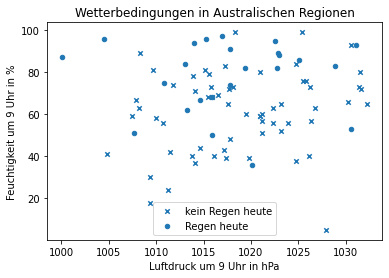

In [235]:
fig, ax = plt.subplots()

markers = {'No':'x', 'Yes':'o'}

sample_noRain = sample[sample["RainToday"] == "No"]
sample_Rain = sample[sample["RainToday"] == "Yes"]

sample_noRain.plot.scatter(x='Pressure9am', y="Humidity9am", marker="x", ax=ax, label="kein Regen heute")
sample_Rain.plot.scatter(x='Pressure9am', y="Humidity9am", marker="o", ax=ax, label="Regen heute")
plt.title("Wetterbedingungen in Australischen Regionen")
ax.set_xlabel('Luftdruck um 9 Uhr in hPa', fontsize=10)
ax.set_ylabel('Feuchtigkeit um 9 Uhr in %', fontsize=10)
plt.show()

fig.savefig("Multidimensional.png")

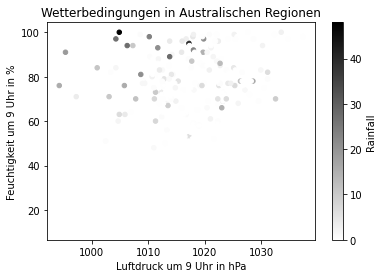

In [167]:
fig, ax = plt.subplots()


sample.plot.scatter(x='Pressure9am', y="Humidity9am", c='Rainfall', ax=ax, cmap="gray_r")
plt.title("Wetterbedingungen in Australischen Regionen")
ax.set_xlabel('Luftdruck um 9 Uhr in hPa', fontsize=10)
ax.set_ylabel('Feuchtigkeit um 9 Uhr in %', fontsize=10)

plt.show()

fig.savefig("Multidimensional.png")

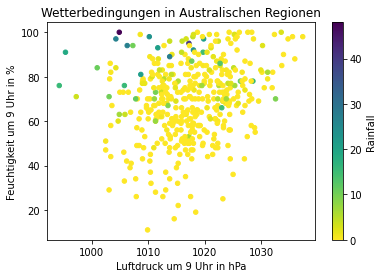

In [169]:
fig, ax = plt.subplots()


sample.plot.scatter(x='Pressure9am', y="Humidity9am", c='Rainfall', ax=ax, cmap="viridis_r")
plt.title("Wetterbedingungen in Australischen Regionen")
ax.set_xlabel('Luftdruck um 9 Uhr in hPa', fontsize=10)
ax.set_ylabel('Feuchtigkeit um 9 Uhr in %', fontsize=10)

plt.show()

fig.savefig("Multidimensional.png")

In [174]:
# code from https://stackoverflow.com/questions/16267143/matplotlib-single-colored-colormap-with-saturation



def CustomCmap(from_rgb,to_rgb):

    # from color r,g,b
    r1,g1,b1 = from_rgb

    # to color r,g,b
    r2,g2,b2 = to_rgb

    cdict = {'red': ((0, r1, r1),
                   (1, r2, r2)),
           'green': ((0, g1, g1),
                    (1, g2, g2)),
           'blue': ((0, b1, b1),
                   (1, b2, b2))}

    cmap = LinearSegmentedColormap('custom_cmap', cdict)
    return cmap

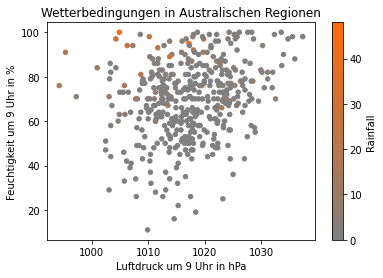

In [177]:
from matplotlib.colors import LinearSegmentedColormap

cmap4 = CustomCmap([0.50, 0.50, 0.50], [1.00, 0.42, 0.04]) # from +/- 255,108,10 to grey (128)

fig, ax = plt.subplots()


sample.plot.scatter(x='Pressure9am', y="Humidity9am", c='Rainfall', ax=ax, cmap=cmap4)
plt.title("Wetterbedingungen in Australischen Regionen")
ax.set_xlabel('Luftdruck um 9 Uhr in hPa', fontsize=10)
ax.set_ylabel('Feuchtigkeit um 9 Uhr in %', fontsize=10)

plt.show()

fig.savefig("Multidimensional.png")

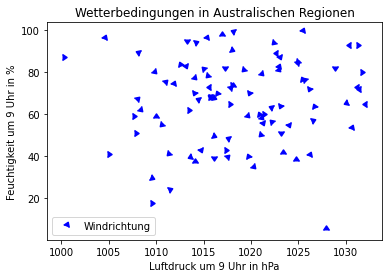

In [223]:

from matplotlib.markers import MarkerStyle



fig, ax = plt.subplots()


for index, row in sample.iterrows():
    m = MarkerStyle(10)
    m._transform.rotate_deg(row["WindGustDirDeg"])
    plt.scatter(x=row['Pressure9am'], y=row["Humidity9am"], marker=m, color="b", label="Windrichtung")



plt.title("Wetterbedingungen in Australischen Regionen")
ax.set_xlabel('Luftdruck um 9 Uhr in hPa', fontsize=10)
ax.set_ylabel('Feuchtigkeit um 9 Uhr in %', fontsize=10)
plt.legend(("Windrichtung",), loc="best")
plt.show()

fig.savefig("Multidimensional.png")

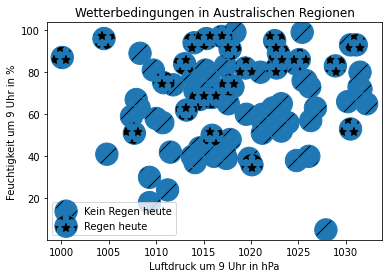

In [238]:
fig, ax = plt.subplots()

sample_noRain = sample[sample["RainToday"] == "No"]
sample_Rain = sample[sample["RainToday"] == "Yes"]

sample_noRain.plot.scatter(x='Pressure9am', y="Humidity9am", hatch = "/", s=500, ax=ax, label="Kein Regen heute")
sample_Rain.plot.scatter(x='Pressure9am', y="Humidity9am", hatch = "*", s=500, ax=ax, label="Regen heute")
plt.title("Wetterbedingungen in Australischen Regionen")
ax.set_xlabel('Luftdruck um 9 Uhr in hPa', fontsize=10)
ax.set_ylabel('Feuchtigkeit um 9 Uhr in %', fontsize=10)
plt.legend(loc="lower left")
plt.show()

fig.savefig("Multidimensional.png")